# Détection de Fraude par Carte de Crédit

Ce notebook traite de la détection de fraudes par carte de crédit en utilisant des techniques d'apprentissage automatique. Nous utiliserons des données de transactions pour construire et évaluer un modèle de classification capable d'identifier les transactions frauduleuses.


## Table des Matières
1. [Chargement des Bibliothèques et des Données](#chargement-des-bibliothèques-et-des-données)
2. [Exploration des Données](#Exploration-des-Données)
3. [Préparation des Données](#Préparation-des-Données)
4. [Construction et Évaluation du Modèle](#Construction-et-Évaluation-du-Modèle)
5. [Conclusion](#Conclusion)


## Données



## Objectif
L'objectif de ce notebook est de :
1. Préparer les données pour l'analyse.
2. Explorer et visualiser les données.
3. Construire un modèle de classification pour détecter les fraudes.
4. Évaluer les performances du modèle.


### Chargement des Bibliothèques et des Données
Les données utilisées proviennent d'un jeu de données public contenant des transactions par carte de crédit réalisées par des titulaires de carte européens en septembre 2013. Le jeu de données comprend des transactions effectuées en deux jours, avec 492 fraudes sur 284,807 transactions.

Importation des bibliothèques nécessaires et chargement des données.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from pylab import rcParams


In [2]:
data=pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Exploration des Données

In [3]:
# prints information about the DataFrame. The information contains the number of columns, column labels, column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#Identifying any NAN value in dataset
data.isnull().sum(axis=0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# check for duplicates
duplicates = data[data.duplicated()]
print("Number of duplicates: " ,len (duplicates) )

Number of duplicates:  1081


In [6]:
# Checking for outliers
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# checking dtypes
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
# show shape of data after removing duplicates
data.shape

(284807, 31)

In [9]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [10]:
data.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [11]:
# returns the number of unique values for each column
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [12]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
# checking for the value counts
data["Amount"].value_counts()

Amount
1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
62.09          1
552.05         1
1467.75        1
196.68         1
95.63          1
Name: count, Length: 32767, dtype: int64

In [14]:
#Describing the data
print("Shape of the Data:", data.shape)
print("Description of the data:")
print(data.describe())

Shape of the Data: (284807, 31)
Description of the data:
                Time            V1            V2            V3            V4   
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  \
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9   
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  \
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2

In [15]:
#Determine the number of fraud cases
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
OutlierFraction=len(fraud)/float(len(valid))
print("Number of fraud cases as compared to valid cases:", OutlierFraction)
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

Number of fraud cases as compared to valid cases: 0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


In [16]:
#Details of Fraudulent transaction
print("Amount details of Fraudulent Transaction:")
fraud.Amount.describe()

Amount details of Fraudulent Transaction:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
#Details of Valid Transaction
print("Amount details of Valid Transaction:")
valid.Amount.describe()

Amount details of Valid Transaction:


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

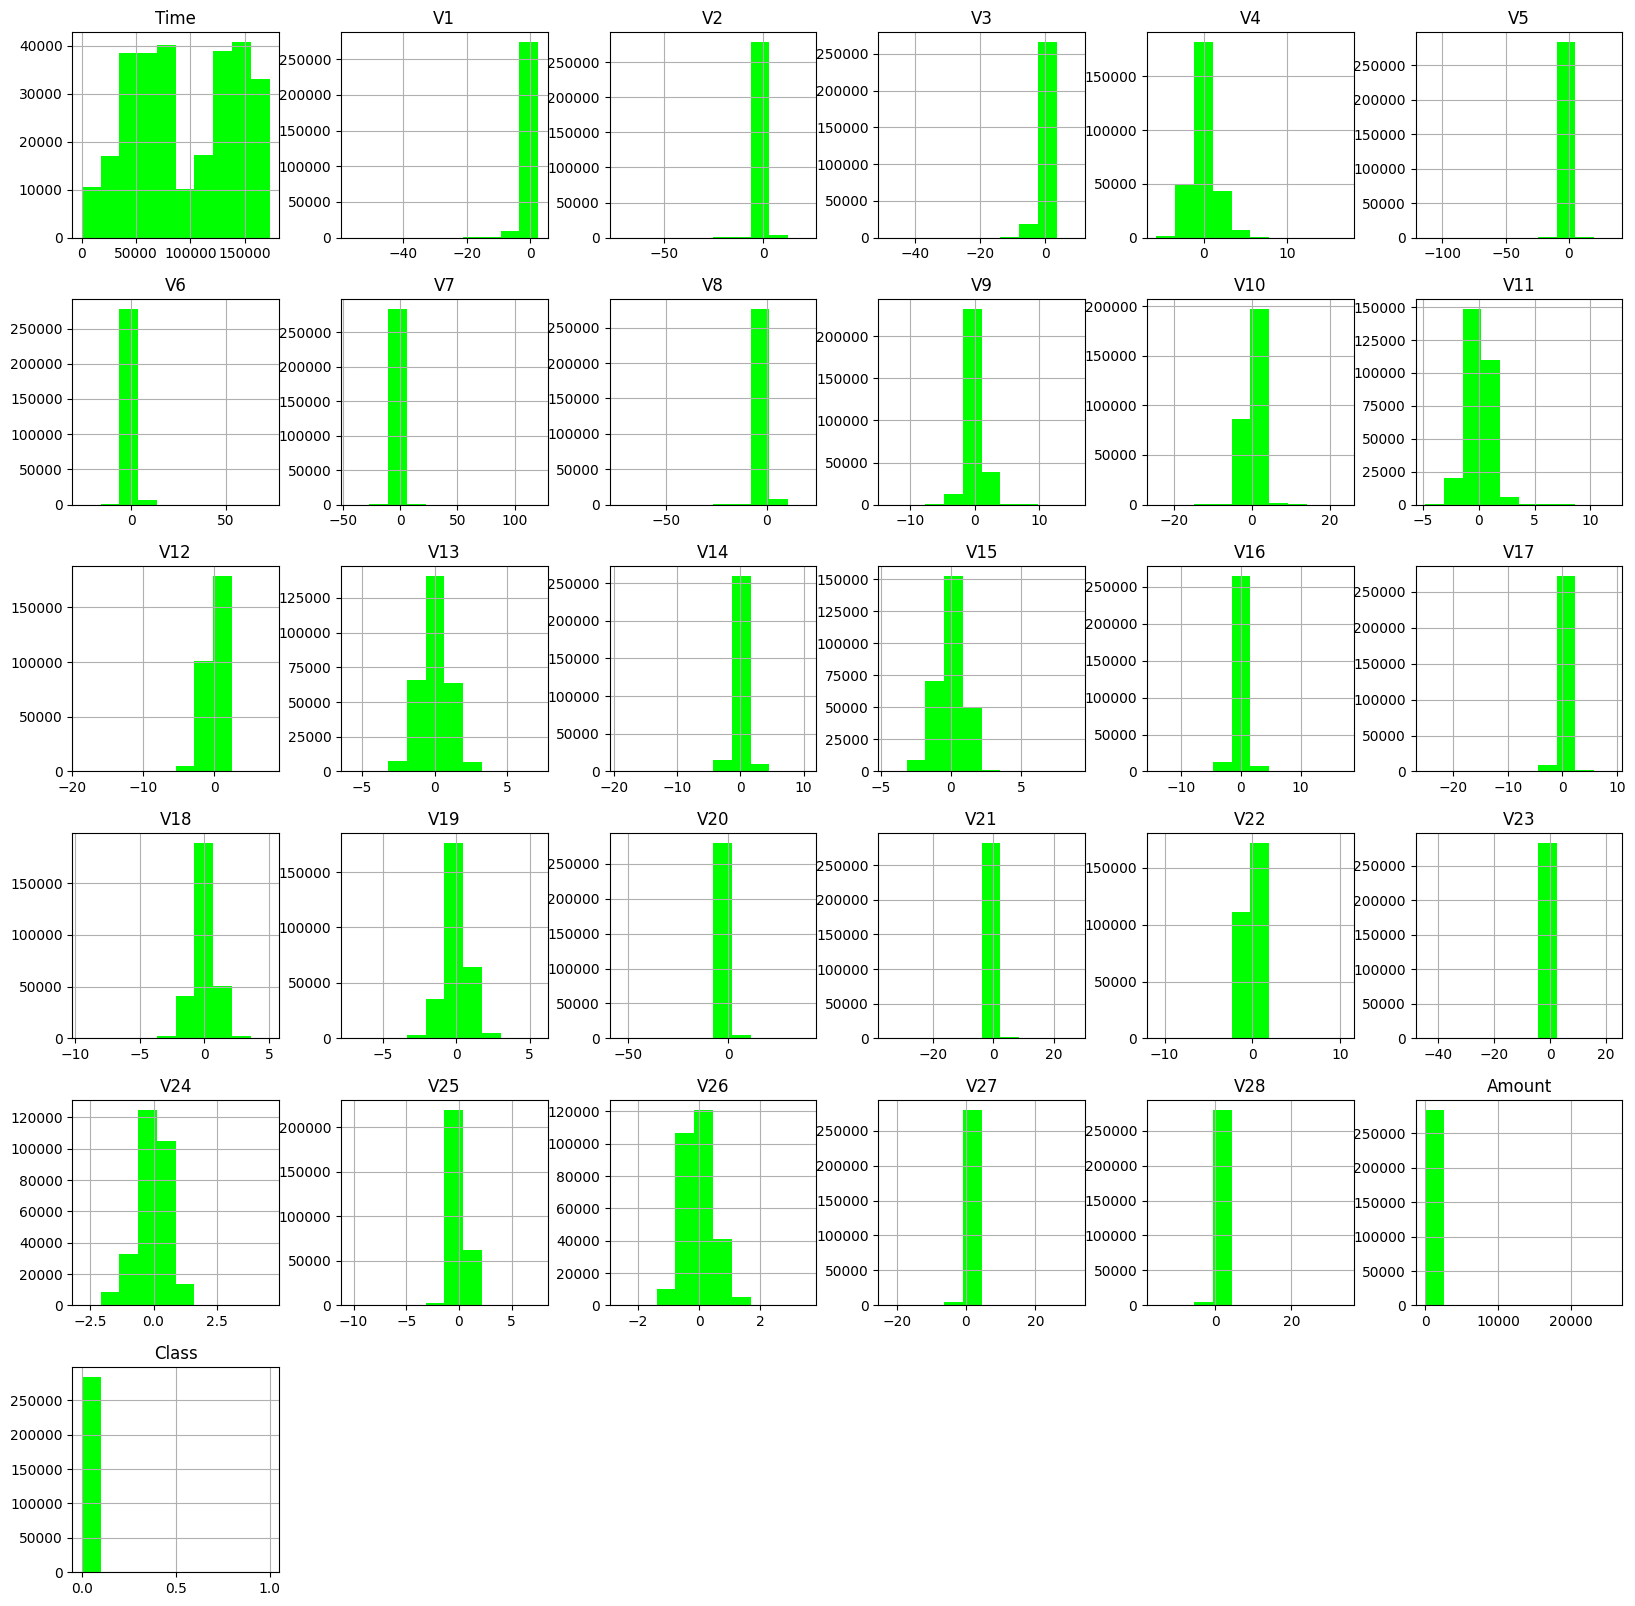

In [18]:
data.hist(figsize=(20,20),color='lime')
plt.show()

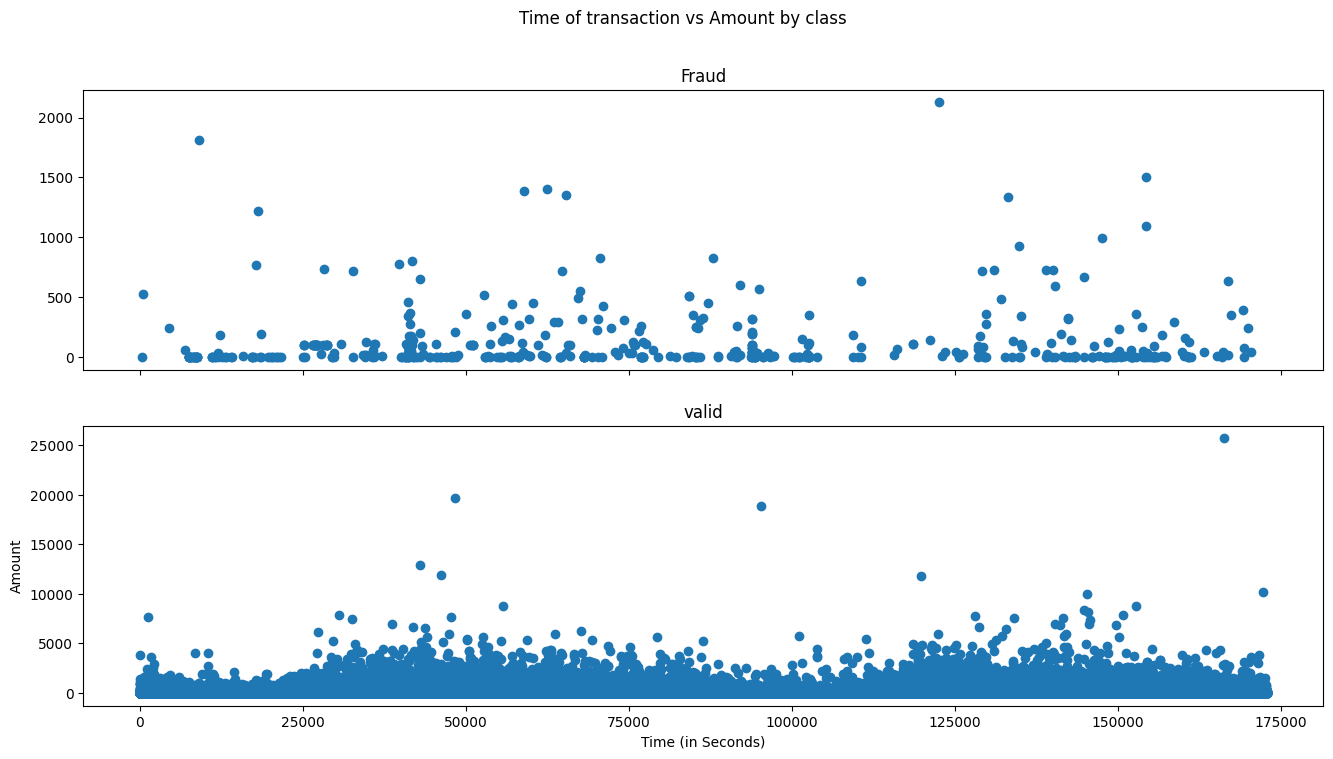

In [19]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(valid.Time, valid.Amount)
ax2.set_title('valid')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

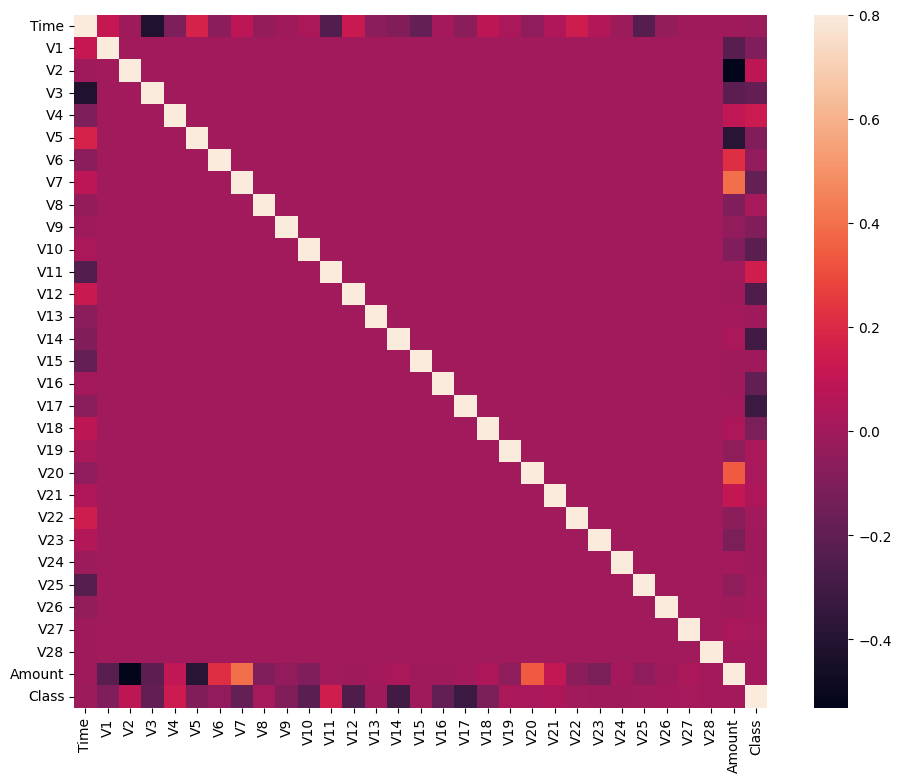

In [20]:
#Correlation matrix for given dataset
corrmat=data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

## Construction et Évaluation du Modèle

In [21]:
#Creating X and y labels using the dataset
X=data.drop(['Class'],axis=1)
Y=data['Class']
print("Shape of X:", X.shape)
print("Shape of Y:" , Y.shape)

xData=X.values
yData=Y.values

Shape of X: (284807, 30)
Shape of Y: (284807,)


In [22]:
#Using Skicit-learn to split data into training and testing data
from sklearn.model_selection import train_test_split

#Spliting the data into training and testing data
xTrain,xTest,yTrain,yTest=train_test_split(xData,yData,test_size=0.2,random_state=42)

print("Shape of Training Data:",xTrain.shape)
print("Shape of Testing Data:",xTest.shape)

Shape of Training Data: (227845, 30)
Shape of Testing Data: (56962, 30)


In [23]:
#Building a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#Random forest model creation
rfc=RandomForestClassifier()
rfc.fit(xTrain,yTrain)

RandomForestClassifier()

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the data
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xTest_scaled = scaler.transform(xTest)  # Assuming you also want to scale your test data

# Fit the logistic regression model on the scaled data
logreg = LogisticRegression(max_iter=1000)
logreg.fit(xTrain_scaled, yTrain)


LogisticRegression(max_iter=1000)

In [25]:
# Evaluating the Logistic Regression Classifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

# Assuming yPred is the predicted values from the logistic regression model
yPred = logreg.predict(xTest_scaled)  # If scaling was used
# yPred = logreg.predict(xTest)  # If scaling was not used

n_outliers = len(fraud)  # Assuming 'fraud' is defined elsewhere in your code
n_errors = (yPred != yTest).sum()
print("The model used is Logistic Regression classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is {}".format(MCC))


The model used is Logistic Regression classifier
The accuracy is 0.9991222218320986
The precision is 0.8636363636363636
The recall is 0.5816326530612245
The F1-Score is 0.6951219512195121
The Matthews correlation coefficient is 0.708352596990073


In [26]:
from sklearn.model_selection import GridSearchCV


# Définir la grille des hyperparamètres
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Initialiser le modèle de régression logistique
logreg = LogisticRegression(max_iter=1000)

# Grid Search avec validation croisée
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(xTrain_scaled, yTrain)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Best hyperparameters: {}".format(best_params))

# Entraîner le modèle avec les meilleurs hyperparamètres
best_logreg = grid_search.best_estimator_
best_logreg.fit(xTrain_scaled, yTrain)

# Prédiction et évaluation
yPred_best = best_logreg.predict(xTest_scaled)
acc_best = accuracy_score(yTest, yPred_best)
prec_best = precision_score(yTest, yPred_best)
rec_best = recall_score(yTest, yPred_best)
f1_best = f1_score(yTest, yPred_best)
mcc_best = matthews_corrcoef(yTest, yPred_best)

# Affichage des résultats optimisés
print("The optimized Logistic Regression classifier")
print("The accuracy is {}".format(acc_best))
print("The precision is {}".format(prec_best))
print("The recall is {}".format(rec_best))
print("The F1-Score is {}".format(f1_best))
print("The Matthews correlation coefficient is {}".format(mcc_best))


Best hyperparameters: {'C': 10, 'solver': 'newton-cg'}
The optimized Logistic Regression classifier
The accuracy is 0.9991222218320986
The precision is 0.8636363636363636
The recall is 0.5816326530612245
The F1-Score is 0.6951219512195121
The Matthews correlation coefficient is 0.708352596990073


In [27]:
#Predicting on Test set using above trained models
yPred=rfc.predict(xTest)

In [28]:
#Evaluating the Random Forest Classifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9995962220427653
The precision is 0.9746835443037974
The recall is 0.7857142857142857
The F1-Score is 0.8700564971751412
The Matthews correlation coefficient is0.8749276812909632


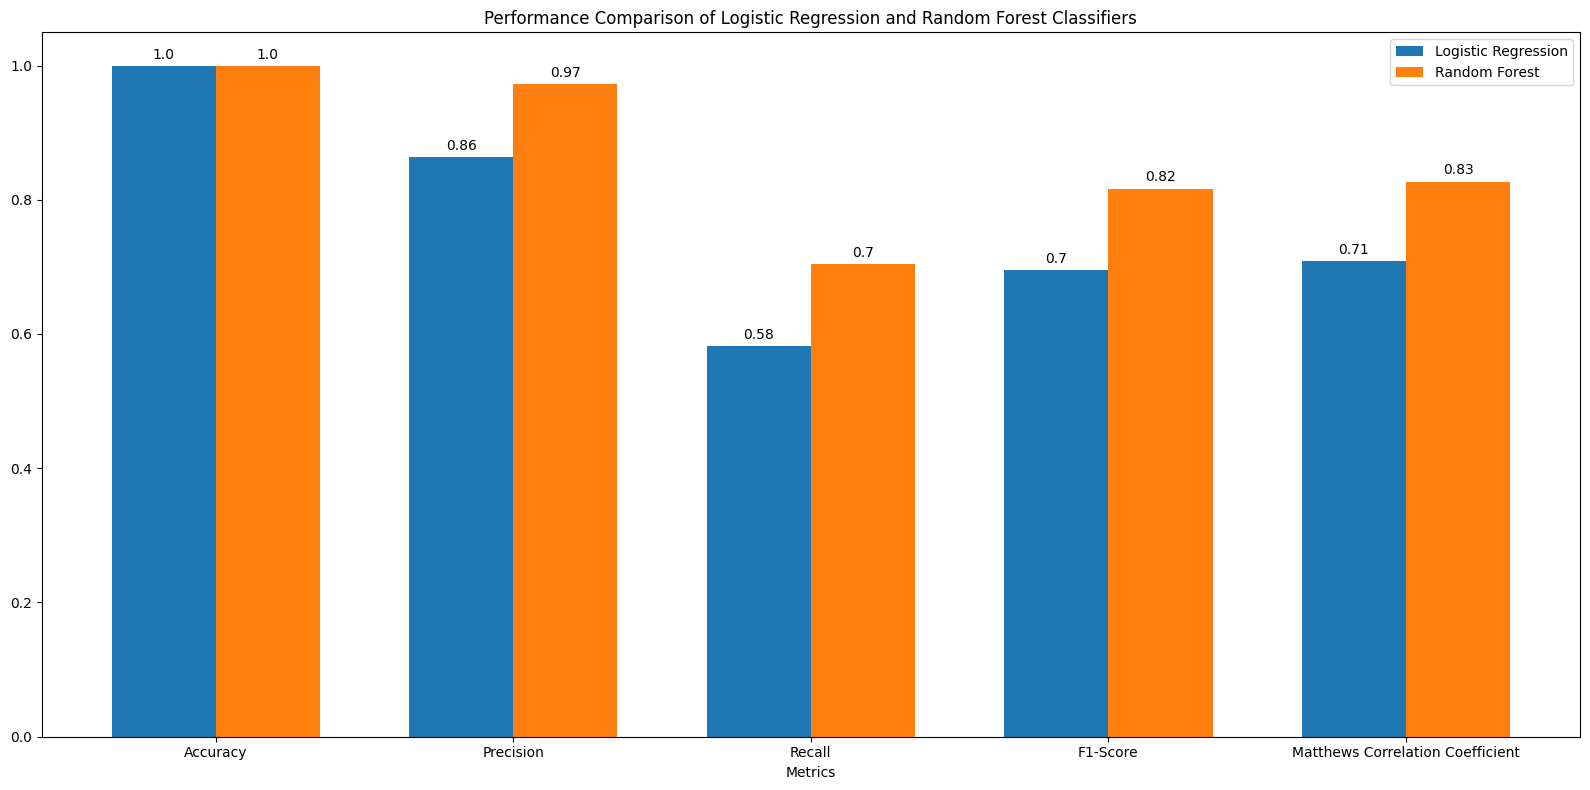

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the data
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xTest_scaled = scaler.transform(xTest)  # Assuming you also want to scale your test data

# Fit the logistic regression model on the scaled data
yPred_logreg = LogisticRegression(max_iter=1000)
yPred_logreg.fit(xTrain_scaled, yTrain)

# Evaluating the Logistic Regression Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Assuming yPred_logreg is the predicted values from the logistic regression model
yPred_logreg = yPred_logreg.predict(xTest_scaled)  # If scaling was used
# yPred_logreg = logreg.predict(xTest)  # If scaling was not used

logreg_metrics = {
    "Accuracy": accuracy_score(yTest, yPred_logreg),
    "Precision": precision_score(yTest, yPred_logreg),
    "Recall": recall_score(yTest, yPred_logreg),
    "F1-Score": f1_score(yTest, yPred_logreg),
    "Matthews Correlation Coefficient": matthews_corrcoef(yTest, yPred_logreg)
}

#Building a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#Random forest model creation
yPred_rf=RandomForestClassifier()
yPred_rf.fit(xTrain,yTrain)
# Assuming yPred_rf is the predicted values from the random forest model
yPred_rf = rfc.predict(xTest_scaled)  # If scaling was used
# yPred_rf = rf.predict(xTest)  # If scaling was not used

rf_metrics = {
    "Accuracy": accuracy_score(yTest, yPred_rf),
    "Precision": precision_score(yTest, yPred_rf),
    "Recall": recall_score(yTest, yPred_rf),
    "F1-Score": f1_score(yTest, yPred_rf),
    "Matthews Correlation Coefficient": matthews_corrcoef(yTest, yPred_rf)
}

# Visualization
labels = list(logreg_metrics.keys())
logreg_values = list(logreg_metrics.values())
rf_values = list(rf_metrics.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, logreg_values, width, label='Logistic Regression')
rects2 = ax.bar(x + width/2, rf_values, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Performance Comparison of Logistic Regression and Random Forest Classifiers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [ ]:
data.drop(['Class'],axis=1, inplace = True)

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
values = input("Enter values for 'Time', 'v1' to 'v28', and 'Amount' separated by spaces: ").split()

Time = float(values[0])
v1 = float(values[1])
v2 = float(values[2])
v3 = float(values[3])
v4 = float(values[4])
v5 = float(values[5])
v6 = float(values[6])
v7 = float(values[7])
v8 = float(values[8])
v9 = float(values[9])
v10 = float(values[10])
v11 = float(values[11])
v12 = float(values[12])
v13 = float(values[13])
v14 = float(values[14])
v15 = float(values[15])
v16 = float(values[16])
v17 = float(values[17])
v18 = float(values[18])
v19 = float(values[19])
v20 = float(values[20])
v21 = float(values[21])
v22 = float(values[22])
v23 = float(values[23])
v24 = float(values[24])
v25 = float(values[25])
v26 = float(values[26])
v27 = float(values[27])
v28 = float(values[28])
Amount = float(values[29])


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xTrain, yTrain)

test_list = [Time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10,
             v11, v12, v13, v14, v15, v16, v17, v18, v19, v20,
             v21, v22, v23, v24, v25, v26, v27, v28, Amount]

test_df = pd.DataFrame(test_list)
test = test_df.transpose()

test_pred = model.predict(test)

if test_pred == 1:
    print("Fraudulent Transaction Detected.")
else:
    print("Non-Fraudulent Transaction.")


Non-Fraudulent Transaction.
